## **맨 윗 층에서 시작하여, 그 아래의 양 옆, 두 가지 경우의 수로 이동할 수 있을 때, 얻을 수 있는 최대 개수는?**

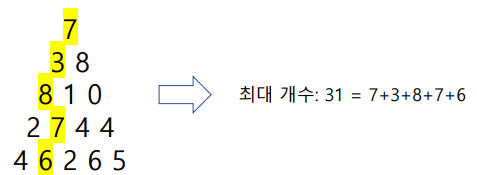

dfs로 dp를 돌리는 경우가 간혹 등장한다. 이때 재귀를 사용하게 되는데, 재귀 함수의 인자로 제공해줄 수 있는 인수는 기존 인수 값을 내부에서 바꾸어 전송하기보다는 함수 호출 값 안에서만 바꾸어 전송하는 편이 덜 헷갈린다. 즉 공용으로 사용하게 되는 재귀 함수 인자는 앞으로의 스텝에서 계속 필요한 변화(visited 등)가 아니라 그 스텝에서만 사용하고 말 값이라면 재귀 호출 시에만 바꾸어 전송하는 편이 낫다.

In [ ]:
floor = int(input())
building = []
for f in range(floor):
    building.append(list(map(int,input().split(" "))))
dp = [[0]*i for i in range(1,floor+1)]

def dfs(cum, row, col):
    direction = [(1,0),(1,1)]
    for d in direction:
        new_row, new_col = row+d[0], col+d[1]
        if new_row>=floor:
            return
        
        # cum은 다음 스텝에서만 영향을 주는 변수이고, 스텝 증가시 변하므로
        # 다음 재귀함수 호출 시에만 값을 변형하여 전달한다.
        dp[new_row][new_col] = max(cum+building[new_row][new_col], dp[new_row][new_col])
        dfs(cum+building[new_row][new_col], new_row, new_col)

dfs(building[0][0],0,0)
print(max(dp[-1]))